In [6]:
import cleo_tools as cleo
import numpy as np
import h5py
from math import sqrt

import matplotlib.pylab as plt
import seaborn as sn

import time

import os

%matplotlib notebook

In [7]:
def mass(e,px,py,pz):
    m2 = (e**2) - (px**2)+(py**2)+(pz**2)
    if m2>=0:
        return sqrt(m2)
    else:
        return -sqrt(-m2)


In [8]:
tests = []
read_times = []
process_times = []
file_sizes = []

In [9]:
#infilename = 'small_CLEO_test_file.dat'
infilename = 'data31_100k_LARGE.dat'
#infilename = 'Single_Dp_to_Kpipi_ISR.dat'
#infilename = 'Single_Dm_to_Kpipi_ISR.dat'

In [10]:
start = time.time()

infile = open(infilename)
collisions = cleo.get_collisions(infile)

read_time = time.time() - start
print "Time to read in data is %f seconds" % (read_time)
read_times.append(read_time)
tests.append("Text file")
file_size = os.path.getsize(infilename)/1e6
print "File size in Mb %f" % (file_size)
file_sizes.append(file_size)

Time to read in data is 5.017031 seconds
File size in Mb 67.569610


In [11]:
masses0 = []

start = time.time()

for collision in collisions:
    
    pions,kaons,muons,electrons,photons = collision

    npions = len(pions)
    nkaons = len(kaons)
    
    if npions>=2 and nkaons>=1:
        
        for i in range(0,npions-1):
            pion0 = pions[i]
            for j in range(i+1,npions):
                pion1 = pions[j]
                for k in range(0,nkaons):
                    kaon = kaons[k]
                    
                    # Check the charges
                    if pion0[4]==pion1[4] and pion0[4]==-kaon[4]:
                        e = pion0[0] + pion1[0] + kaon[0]
                        px = pion0[1] + pion1[1] + kaon[1]
                        py = pion0[2] + pion1[2] + kaon[2]
                        pz = pion0[3] + pion1[3] + kaon[3]
                        
                        m = mass(e,px,py,pz)
                        
                        masses0.append(m)

                        
process_time = time.time() - start
print "Time to run over the data is %f seconds" % (process_time)
process_times.append(process_time)

Time to run over the data is 0.235886 seconds


<IPython.core.display.Javascript object>


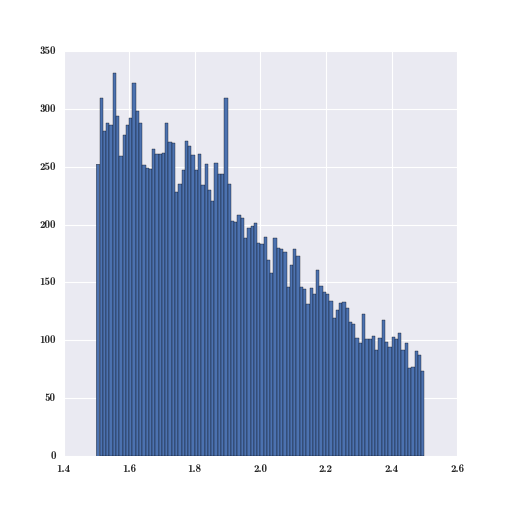

In [12]:
plt.figure(figsize=(4,4))
plt.hist(masses0,bins=100,range=(1.5,2.5));

In [13]:
len(collisions)

100001

In [14]:
# Alternative way to run over the code
tests.append("Text file - unpack to variables")
read_times.append(read_time)
file_sizes.append(file_size)

masses1 = []

start = time.time()

for collision in collisions:
    
    pions,kaons,muons,electrons,photons = collision

    npions = len(pions)
    nkaons = len(kaons)
    
    if npions>=2 and nkaons>=1:
        
        for i in range(0,npions-1):
            e_pi0,px_pi0,py_pi0,pz_pi0,q_pi0 = pions[i][0:5]
            for j in range(i+1,npions):
                e_pi1,px_pi1,py_pi1,pz_pi1,q_pi1 = pions[j][0:5]
                for k in range(0,nkaons):
                    e_k,px_k,py_k,pz_k,q_k = kaons[k][0:5]
                    
                    # Check the charges
                    if q_pi0==q_pi1 and q_pi0==-q_k:
                        e =  e_pi0  + e_pi1  + e_k
                        px = px_pi0 + px_pi1 + px_k
                        py = py_pi0 + py_pi1 + py_k
                        pz = pz_pi0 + pz_pi1 + pz_k
                        
                        m = mass(e,px,py,pz)
                        
                        masses1.append(m)

process_time = time.time()-start
print "Time to run over the data is %f seconds" % (process_time)
process_times.append(process_time)
                        

Time to run over the data is 0.284191 seconds


<IPython.core.display.Javascript object>


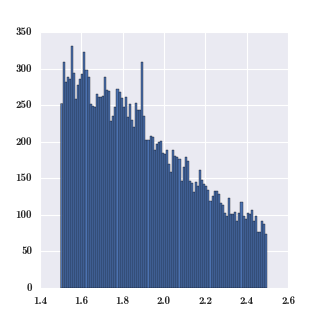

In [15]:
plt.figure(figsize=(4,4))
plt.hist(masses1,bins=100,range=(1.5,2.5));

In [16]:
print len(masses0)
print len(masses1)

42243
42243


In [17]:
diff = np.array(masses0) - np.array(masses1)
print diff[diff!=0]

[]


<IPython.core.display.Javascript object>


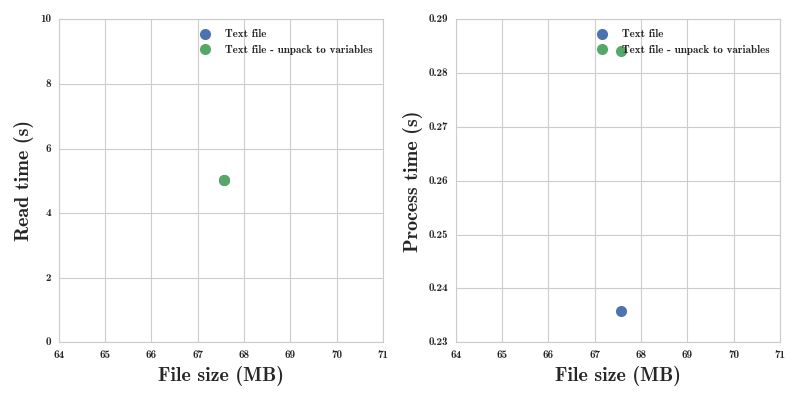

/home/fred/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/fred/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1298: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=400:stretch=normal:size=10.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/home/fred/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1298: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=400:stretch=normal:size=18.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


In [18]:
sn.set_style('whitegrid')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
for x,y,l in zip(file_sizes,read_times,tests):
    plt.plot(x,y,'o',label=l,markersize=10)
plt.xlabel("File size (MB)",fontsize=18)
plt.ylabel("Read time (s)",fontsize=18)
plt.ylim(0,10)
plt.legend()

plt.subplot(1,2,2)
for x,y,l in zip(file_sizes,process_times,tests):
    plt.plot(x,y,'o',label=l,markersize=10)
plt.xlabel("File size (MB)",fontsize=18)
plt.ylabel("Process time (s)",fontsize=18)
#plt.ylim(0.3,0.4)
plt.legend()

plt.tight_layout()